# Estudando a modulação e o efeito do ruído

In [1]:
import numpy as np
from matplotlib import pyplot as plt


np.random.seed(42) # a resposta correta para tudo.

# Gerando símbolos

Para gerar símbolos para o transmissor precisamos a priori gerar os bits que queremos transmitir, desta forma, a modulação nada mais é que uma *codificação* bit para símbolos do nosso sistema de transmissão.

In [2]:
bit_size = 128
bits = np.random.choice([0,1], bit_size)
print(bits)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0]


O vetor acima representa nosso vetor de transmissão. Para refrescar nossa memória, a figura abaixo representa um sistema de transmissão completo

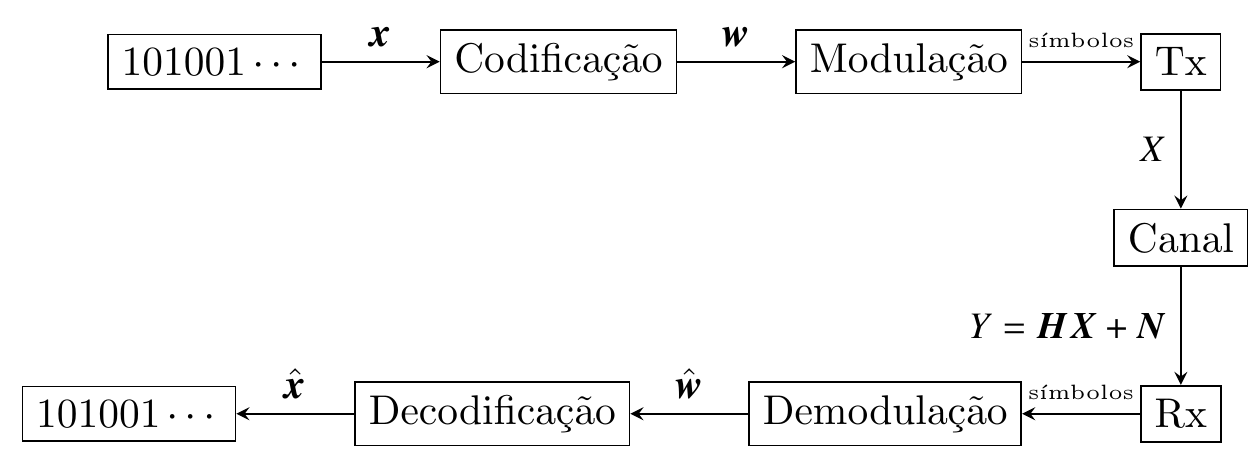

Segundo nossa figura, geramos o vetor $\mathbf{x}$, iremos, por simplicidade, pular a etapa de codificação, desta forma, $\mathbf{w} = \mathbf{x}$.
Iremos gerar nossos símbolos agora a partir do processo de modulação.

In [3]:
def get_circle(x,y,r):
    th = np.arange(0, 2*np.pi, np.pi/100)
    xunit = r * np.cos(th) + x
    yunit = r * np.sin(th) + y

    return xunit, yunit

def db2lin(value):
    return 10**(value/10)

def lin2db(value):
    return 10*np.log(value)

In [4]:
def bpsk_modulator(bit_stream):
    symbols = np.zeros((len(bit_stream)),dtype=complex)

    for ii in range(len(bit_stream)):
        if bit_stream[ii] == 0:
            symbols[ii] = -1 + 0j
        else:
            symbols[ii] = 1 + 0j

    return symbols

In [5]:
simbolos = bpsk_modulator(bits)
print(simbolos)

[-1.+0.j  1.+0.j -1.+0.j -1.+0.j -1.+0.j  1.+0.j -1.+0.j -1.+0.j -1.+0.j
  1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j
  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
  1.+0.j  1.+0.j  1.+0.j -1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j -1.+0.j
  1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j
  1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j
 -1.+0.j  1.+0.j  1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
 -1.+0.j -1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
 -1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j
  1.+0.j -1.+0.j  1.+0.j -1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j
  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
 -1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j
  1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1

## Visualizando

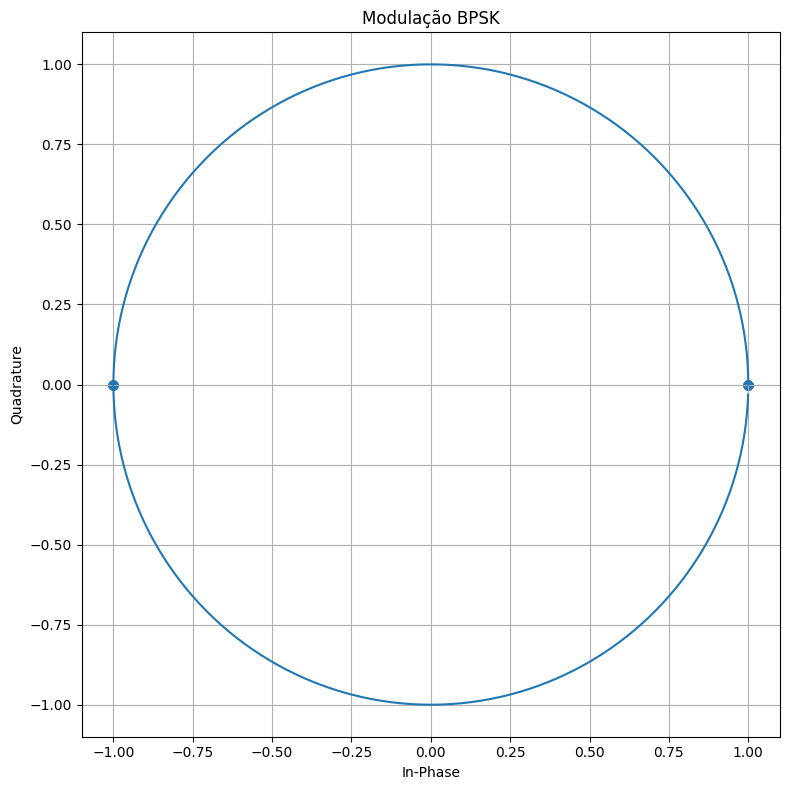

In [6]:
x_circle, y_circle = get_circle(0,0,1)

plt.figure(figsize=(8,8))

plt.title('Modulação BPSK')
plt.scatter(simbolos.real, simbolos.imag)
plt.plot(x_circle, y_circle)
plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.tight_layout() 
plt.grid()

Aqui temos a representação dos símbolos de uma modulação BPSK. Mapeamos todo bit $0$ em um símbolo $-1 +0j$, e, por sua vez, todo bit $1$ em um símbolo $+1 +0j$.

Vamos agora gerar nosso canal, usaremos um canal simples, conhecido como canal de Ruído Branco Aditivo e Gaussiano (do inglês, AWGN), desta forma, o sinal recebido $Y$ será

$$
Y(t) = X(t) + N(t),
$$

onde $N(t) =  \mathcal{CN}(0, \sigma_n^2)$ (Uma distribuição Gaussiana nos complexos com média $0$ e desvio padrão $\sigma_n$. Chamaremos a variância desta distribuição de potência do ruído $\sigma_n^2$).


Da definição acima, é imediato a definição do valor de SNR do nosso sistema de transmissão:

$$
SNR = \frac{p_{Tx}}{\sigma_n^2}.
$$
Afim de simplificarmos, usaremos que $p_{Tx}$ será unitário, desta forma, o desvio padrão do ruído será $\sigma_n = \frac{1}{10^{1/SNR}}$.


In [7]:
SNR = db2lin(-5) # dB
noise_std = 1/(10**(SNR/10))

noise = np.sqrt(noise_std/2)*(np.random.randn(len(simbolos)) + 1j*np.random.randn(len(simbolos)))

Y = simbolos + noise

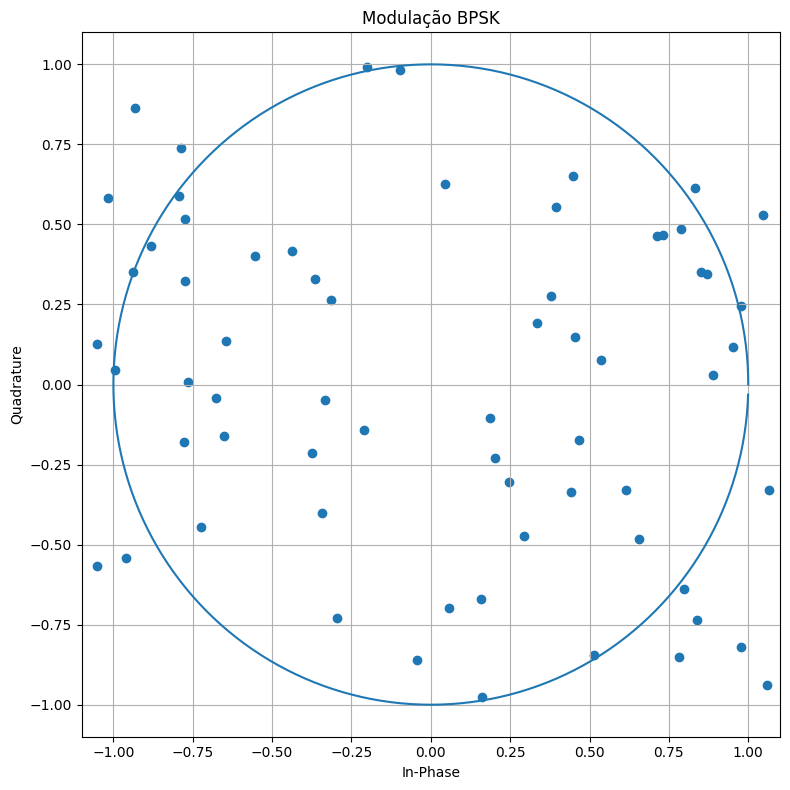

In [8]:
x_circle, y_circle = get_circle(0,0,1)

plt.figure(figsize=(8,8))

plt.title('Modulação BPSK')
plt.scatter(Y.real, Y.imag)
plt.plot(x_circle, y_circle)
plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.tight_layout() 
plt.grid()